<a href="https://colab.research.google.com/github/lelouch0204/Pneumonia-X-Ray-Dataset/blob/main/pneumonia_X_rays_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 47.6MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [ ]:
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import matplotlib.pyplot as plt
import os

In [ ]:
base_dir = 'drive/My Drive/Datasets/Pneumonia X Ray'
path = Path(base_dir)
path, path.ls()

(PosixPath('drive/My Drive/Datasets/Pneumonia X Ray'),
 [PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/train'),
  PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/val'),
  PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/test'),
  PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/models')])

# Data Preprocessing
Here we have been given in the dataset, three folders, namely "test", "train", "val", but there are only 16 photos in the already given validation dataset so it is better to include the validation set in the training set and later split the training and validation set into a fair proportion so that our model doesn't overfit


In [ ]:
train_path = path/'train'
test_path = path/'test'
train_path, test_path

(PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/train'),
 PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/test'))

torch.Size([3, 592, 1032])

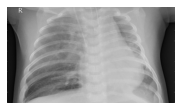

In [ ]:
img = open_image(train_path/'PNEUMONIA'/'person4_bacteria_14.jpeg')
img.show()
img.data.shape

In [ ]:
bs = 64

In [ ]:
arch = models.resnet50

# Transforms
Since the dataset we are performing classification on consists of X-Rays, they are very professionally handled, well lit, and viewed from a proper angle, so there is no need to introduce zooming, or image warping to make our dataset look more "real"

In [ ]:
tfms = get_transforms()

# Creating the dataset

In [ ]:
data = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, test='test',
                                  size=256, bs=bs, ds_tfms=tfms).normalize(imagenet_stats)

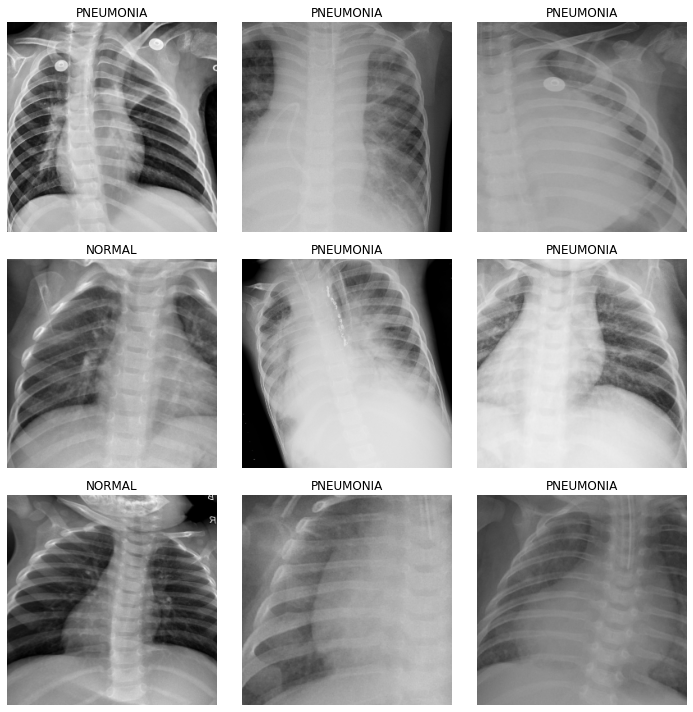

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(['NORMAL', 'PNEUMONIA'], 2, 4218, 1054, 624)

In [ ]:
learn = cnn_learner(data=data, base_arch=arch, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.471925,0.438825,0.091082,42:54
1,0.268819,0.223756,0.056926,04:07
2,0.185535,0.197868,0.054080,03:44
3,0.147601,0.180634,0.049336,03:40


In [ ]:
learn.save('stage-1-resnet50')

In [ ]:
learn.freeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


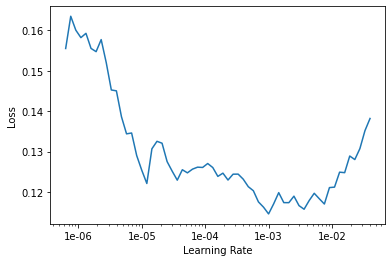

In [ ]:
learn.recorder.plot()

In [ ]:
lr = slice(1e-4, 1e-3)

In [ ]:
learn.fit_one_cycle(10, max_lr=lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.119893,0.162178,0.040797,03:41
1,0.125690,0.177475,0.056926,03:41
2,0.117364,0.133156,0.038899,03:40
3,0.097031,0.157504,0.037002,03:43
4,0.106960,0.106565,0.035104,03:42
5,0.084627,0.139859,0.038899,03:42
6,0.085883,0.149445,0.042694,03:43
7,0.075483,0.119480,0.035104,03:43
8,0.068985,0.107754,0.032258,03:42
9,0.062449,0.110560,0.033207,03:43


In [ ]:
learn.save('stage-2-resnet50')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

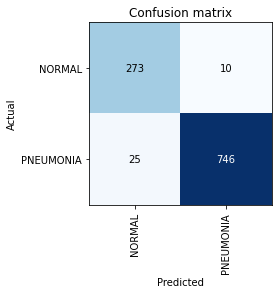

In [ ]:
interp.plot_confusion_matrix()

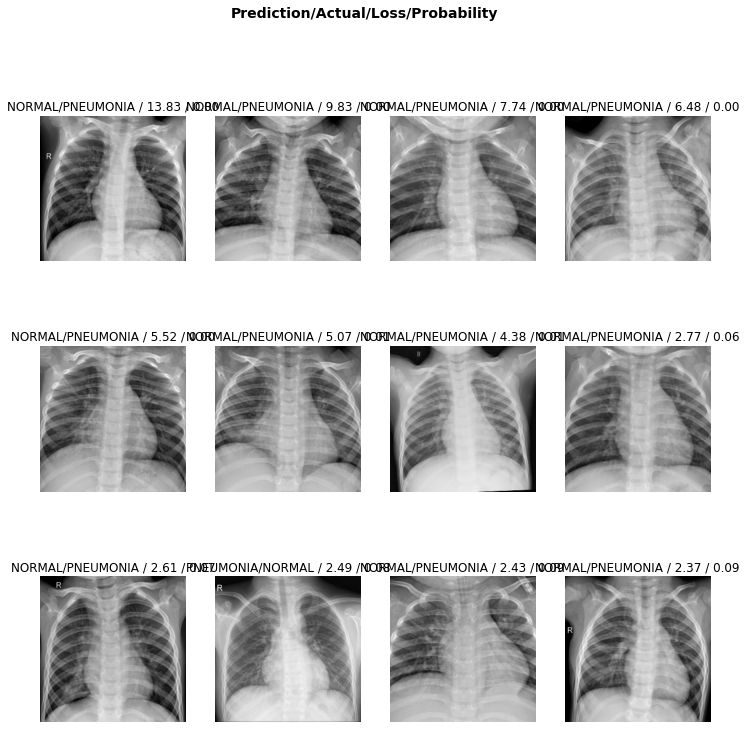

In [ ]:
interp.plot_top_losses(12)